<a href="https://colab.research.google.com/github/86lekwenshiung/Neural-Network-with-Tensorflow/blob/main/01_Neural_Network_Regression_With_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with Neural Network in Tensorflow

Simplyfing Regression Problem : Predicting a numerical variable based on some combination of variables

In [217]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


In [218]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
sns.set()


## Creating data to view and fit

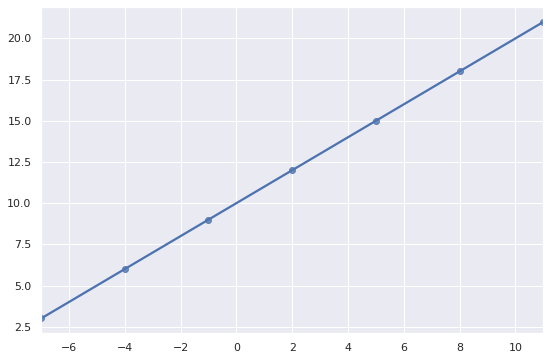

In [219]:
# Create Features
X = np.array(np.arange(-7 , 14 , 3))

# Create labels
y = np.array(np.arange(3,24,3))

#Plotting It
plt.figure(figsize = (9,6))
sns.regplot(x = X, y = y);

## Input and output shape

In [220]:
# Create a demo tensor housing price prediction problem

house_info = tf.constant(['bedroom' , 'bathroom' , 'garage'])
house_price = tf.constant([123456])
house_info , house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([123456], dtype=int32)>)

In [221]:
# Recall that the individual element inside array is a scaler , therefore it is of 0 dim
X[0].shape , y[0].shape , X[0].ndim

((), (), 0)

In [222]:
# Converting Numpy array into tensor
X = tf.constant(X)
y = tf.constant(y)

X[0].shape , y[0].shape , X[0].ndim

(TensorShape([]), TensorShape([]), 0)

## Modelling In Tensorflow

1. Create a model - define input and output layer , as well as the hidden layers of a deep learning model
2. Compiling a model 
  - define the loss function (the function that tell our model how wrong it is
  - define the optimizer (tell our model how to improve our model)
  - evaluation metrics (performance of model)
3. Fitting a model

In [223]:
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = tf.keras.metrics.mae)

# Fit the model
model.fit(X , y , epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 215ms/step - loss: 10.8599 - mean_absolute_error: 10.8599
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 10.8099 - mean_absolute_error: 10.8099
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 10.7599 - mean_absolute_error: 10.7599
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 10.7099 - mean_absolute_error: 10.7099
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 10.6599 - mean_absolute_error: 10.6599


In [224]:
# Prediction using model - Here we will expect by predicting with X = 17 , expected y value is 27. 
# Given that the MAE is around 10 to 10 , our predicted value of 11.4 + 10 still fall out from our expected value
y_pred = model.predict([17])
y_pred

array([[11.441017]], dtype=float32)

## Tuning the model

We can tune our model to give better results by examining each of the steps taken in creating , compiling and fitting.

**1. Creating a model** - Add more layers , increase number of hidden units , change the activation function

**2. Compiling a model** - Change the optimization function , tune the learning rate of the optimization function

**3. Fitting a model** - More epochs (train longer) , give more data

## Typical workflow expectation
- Build a model --> fit it --> evaluate it --> hyperparameter tuning --> fit it --> hyper tuning --> evaluate it --> ....

- **To put it as an analogy , it is like a dial to tune the model**

In [225]:
# Tuning the model (changing the Epoch)

#1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = tf.keras.metrics.mae)

#3. Fir the model
model.fit(X , y , epochs = 100 , verbose = True)

Epoch 1/100
1/1 [==============================] - 0s 487ms/step - loss: 10.6983 - mean_absolute_error: 10.6983
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 10.6483 - mean_absolute_error: 10.6483
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 10.5983 - mean_absolute_error: 10.5983
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5483 - mean_absolute_error: 10.5483
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4983 - mean_absolute_error: 10.4983
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4483 - mean_absolute_error: 10.4483
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.3983 - mean_absolute_error: 10.3983
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 10.3483 - mean_absolute_error: 10.3483
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2983 - mean_absolute_error: 10.2983
Epoch 10

In [226]:
# Making prediction from model again - Tuned model improved closer to expected value of 27 when X = 17
model.predict([17])

array([[32.099113]], dtype=float32)

In [227]:
# Tuning the model (Adding an extra hidden layer with 100 hidden units)

#1. Create model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50 , activation = None),
  tf.keras.layers.Dense(1)
])

#2. Compile a model
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              loss = tf.keras.losses.mae,
              metrics = tf.keras.metrics.mae)

#3. Fit a model
model.fit(X , y , epochs = 100 , verbose = False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [228]:
# Visualising the data - Attempt with larger dataset

In [229]:
X = tf.range(-100 , 100 , 4)
y = X + 10 

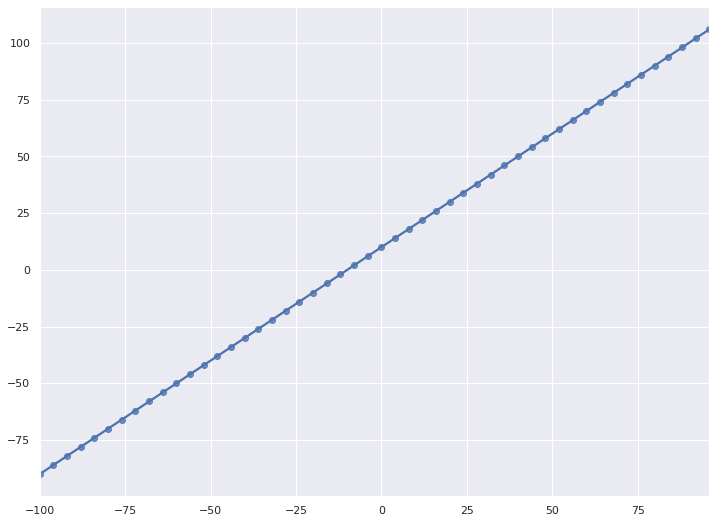

In [230]:
plt.figure(figsize = (12,9))
sns.regplot(x = X , 
            y = y);

In [231]:
X.shape

TensorShape([50])

In [232]:
# Splitting Dataset by train test split
tf.random.set_seed(42)

X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]

X_train , X_test = tf.constant(X_train) , tf.constant(X_test)
y_train , y_test = tf.constant(y_train) , tf.constant(y_test)

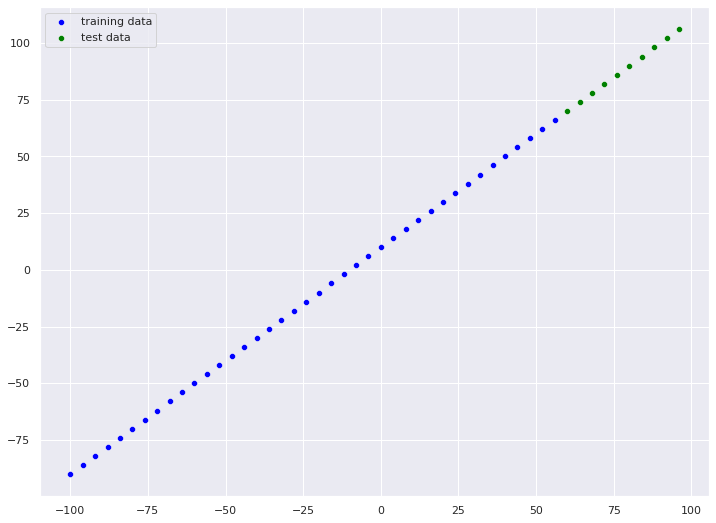

In [233]:
plt.figure(figsize = (12,9))

sns.scatterplot(x = X_train , 
                y = y_train,
                color = 'blue',
                label = 'training data')

sns.scatterplot(x = X_test , 
                y = y_test,
                color = 'green',
                label = 'test data')

plt.legend();

In [234]:
# Creating a new model for new dataset and try building 

tf.random.set_seed(42)

#1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(5 , input_shape = [1] , name = 'input_layer'),
  tf.keras.layers.Dense(1, name = 'output_layer')
] , name = 'Simple_Linear_Regression') 

#2. Compile a model
model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              loss = tf.keras.losses.mae,
              metrics = tf.keras.metrics.mae)

#2a. Model Sumamry
model.summary()

Model: "Simple_Linear_Regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 5)                 10        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 6         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


* Total params - total number of parameters
* Trainable parameters - these are the parameters the model can update as it trains
* Non-trainable params - these params are not updated during training (**transfer learning**)

In [235]:
#3. Fit a model
model.fit(X_train , y_train , epochs = 100 , verbose = False)

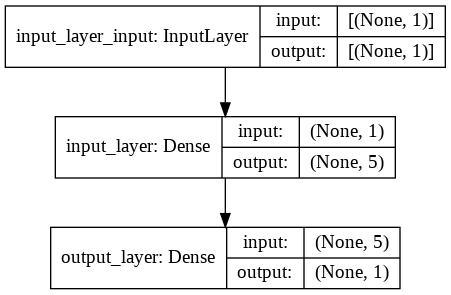

In [236]:
from tensorflow.keras.utils import plot_model
plot_model(model = model , show_shapes=True)

## Visualising our model's prediction

In [237]:
# Predicting on test data

y_pred = model.predict(X_test)

In [238]:
def prediction_plot(train_data = X_train, test_data = X_test, train_labels = y_train, test_labels = y_test, predictions = y_pred):

    plt.figure(figsize = (12,9))

    sns.scatterplot(x = train_data  , y = train_labels , color = 'blue' , label = 'training data')

    sns.scatterplot(x = test_data , y = test_labels , color = 'green' , label = 'test_data')

    sns.scatterplot(x = test_data , y = predictions , color = 'red' , label = 'predictions')

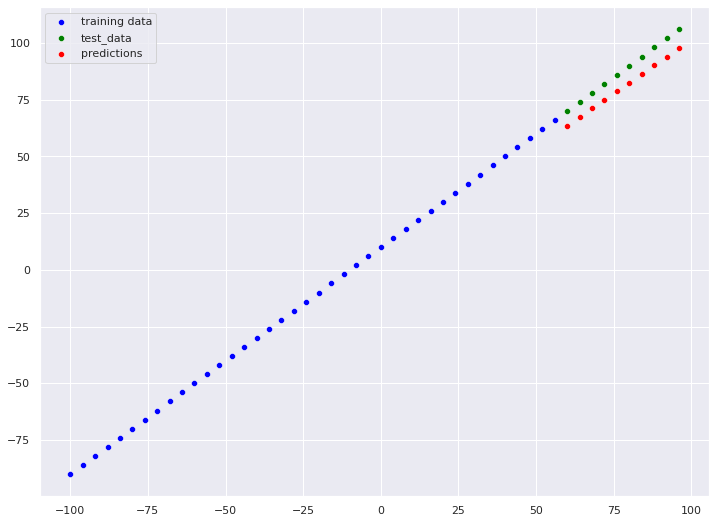

In [239]:
prediction_plot(X_train , X_test , y_train , y_test , tf.squeeze(y_pred))

## Evaluating our model predictions with regression evaluation metrics

- 2 of the main metrics:
  - MAE : Mean Absolute Error
  - MSE : Mean Squared Error

In [240]:
# Evaluate the model on the test
model.evaluate(X_test , y_test)

1/1 [==============================] - 0s 75ms/step - loss: 7.3502 - mean_absolute_error: 7.3502


[7.350157260894775, 7.350157260894775]

In [241]:
# y_pred and y_test not in the same shape
y_pred.shape , y_test.shape

((10, 1), TensorShape([10]))

In [242]:
y_pred = tf.squeeze(y_pred)

In [243]:
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=7.3501573>

In [244]:
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                    y_pred = y_pred)

mse

<tf.Tensor: shape=(), dtype=float32, numpy=54.34441>

In [245]:
# Making Function for MAE and MSE

y_pred = tf.squeeze(y_pred)

def mae(y_true , y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                        y_test = y_test)
  
def mse(y_true , y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                       y_test = y_test)

# Running Experiment to Improve Our Model

1. More data for model to train on
2. Make model larger and complex(more layers , more hidden units)
3. Train for longer - more time for model to find pattern
4. Perform 3 simple modelling experiment with varying parameter
  - `model_1` : 1 layer for 100 epochs
  - `model_2` : 2 layer for 100 epochs
  - `model_3` : 2 layer for 500 epochs

### Build `Model 1`

In [246]:
tf.random.set_seed(42)

#Step 1 : Create a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Step 2 : Compile the model

model_1.compile(loss = tf.losses.mae,
                optimizer = tf.optimizers.SGD(),
                metrics = tf.metrics.mae)

# Step 3 : Fit the model
model_1.fit(X_train , y_train , epochs = 100 , verbose = False)


In [247]:
# Plot prediction model 1 against actual label
y_preds_1 = model_1.predict(X_test)
y_preds_1.shape

(10, 1)

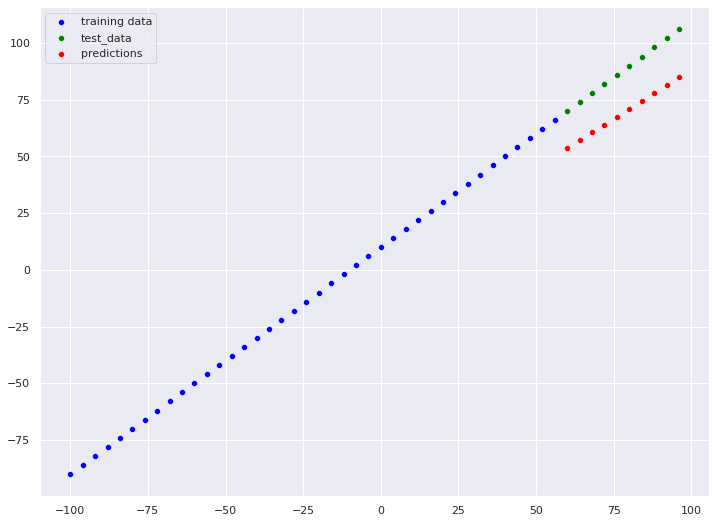

In [248]:
prediction_plot(predictions = tf.squeeze(y_preds_1))

In [249]:
# Metrics for model 1
mae_1 = tf.metrics.mae(y_test , tf.squeeze(y_preds_1))
mse_1 = tf.metrics.mse(y_test , tf.squeeze(y_preds_1))
mae_1 , mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

## Build `Model 2`
 - 2 dense layer with 100 epochs

In [250]:
tf.random.set_seed(42)

# Step 1 : Create a model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])

# Step 2 : Compile a model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = tf.keras.metrics.mse)

#Step 3 : Fit the mode
model_2.fit(X_train , y_train , epochs = 100 , verbose = False)

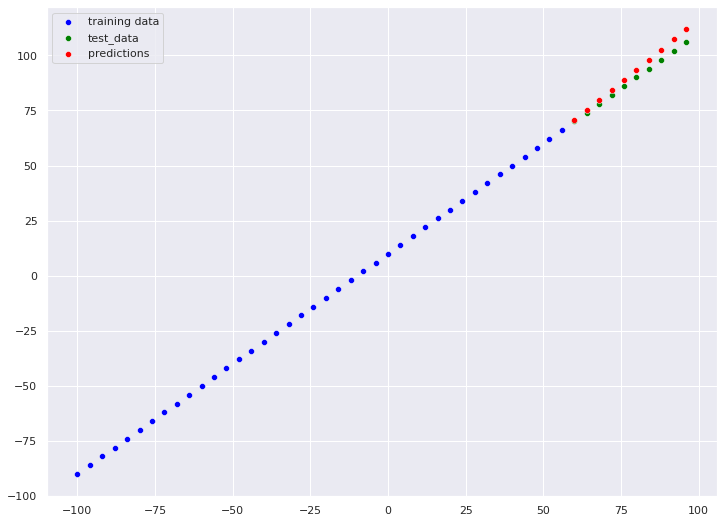

In [251]:
# Plot prediction model 2 against actual label
y_preds_2 = model_2.predict(X_test)
prediction_plot(predictions = tf.squeeze(y_preds_2))

In [252]:
# Metrics for model 2
mae_2 = tf.metrics.mae(y_test , tf.squeeze(y_preds_2))
mse_2 = tf.metrics.mse(y_test , tf.squeeze(y_preds_2))
mae_2 , mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

## Build `Model 3`
 - 2 layers with 500 epochs

In [253]:
tf.random.set_seed(42)

# Step 1 : Create a model

model_3 =  tf.keras.Sequential([
                                tf.keras.layers.Dense(10),
                                tf.keras.layers.Dense(1),

])

# Step 2 : Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = tf.keras.metrics.mae)

# Step 3 : Fit the model
model_3.fit(X_train , y_train , epochs = 500 , verbose = False)

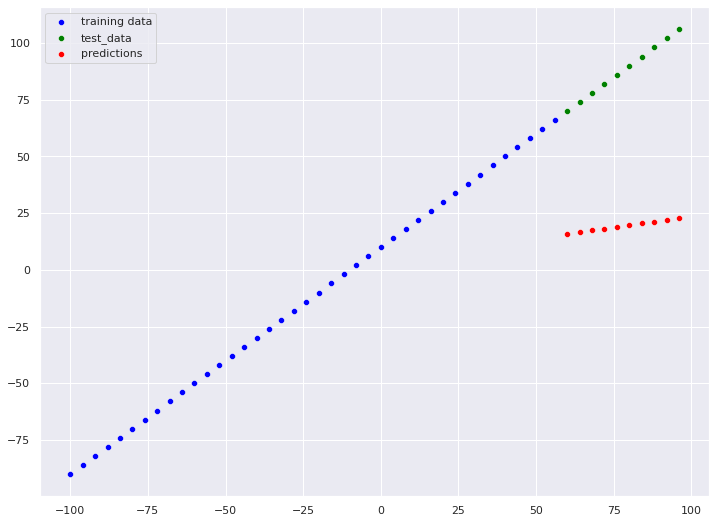

In [254]:
# Plot prediction model 3 against actual label
y_preds_3 = model_3.predict(X_test)
prediction_plot(predictions = tf.squeeze(y_preds_3))

In [255]:
mae_3 = tf.metrics.mae(y_test , tf.squeeze(y_preds_3))
mse_3 = tf.metrics.mse(y_test , tf.squeeze(y_preds_3))
mae_3 , mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

# Comparing Results Visually
- Base on comparison between these simple models , model 2 perform the best
- Model 3 , although more epochs , seem to be overfitted
- Main objective is to minimize the time between experiments. The more experiment executed , the more we able to figure what work and what don't

In [256]:
model_result = [['model_1' , mae_1.numpy() , mse_1.numpy()],
                ['model_2' , mae_2.numpy() , mse_2.numpy()],
                ['model_3' , mae_3.numpy() , mse_3.numpy()]]

df_model_result = pd.DataFrame(data = model_result,
                               columns = ['Model' , 'MAE' , 'MSE'])
df_model_result

,Model,MAE,MSE
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


In [257]:
model_2.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_93 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# Practise Modelling with Data from Kaggle : Medical Dataset (W/O Normalizing & Standardising)
- Source : https://www.kaggle.com/mirichoi0218/insurance
- Source : https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv


In [258]:
df_insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [259]:
# Exploring df_insurance dataset
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [260]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### One hot Encoding of Dataset
 - Required to convert non- numeric colummns into numeric as neural network cannot handle non-numeric input

In [261]:
# One hot Encoding into numbers
df_insurance = pd.get_dummies(df_insurance)

In [262]:
df_insurance.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


### Define dependant and indepedant variable , creating train and test sets

In [263]:
# Define target predicted data or dependent variable- charges
# Define features or predictors or indepedant variable - everything except charges

X = df_insurance.drop('charges' , axis = 1)
y = df_insurance['charges']

In [264]:
np.random.seed(42)

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

### Build & evaluate model

In [265]:
tf.random.set_seed(42)

# Step 1 : Create a model
model_insurance_0 = tf.keras.Sequential([
                                        tf.keras.layers.Dense(10),
                                        tf.keras.layers.Dense(1)
])

# Step 2 : Compile a model
model_insurance_0.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.SGD(),
                          metrics = tf.keras.metrics.mae)

# Step 3 : Fit a model
model_insurance_0.fit(X_train , y_train , epochs = 100 , verbose = False)

In [266]:
# Evaluate the model : Model is not performing very well of the scoring
print(model_insurance_0.evaluate(X_test , y_test))
print('Median of y_train:' , y_train.median())
print('Mean of y_train:' , y_train.mean())

9/9 [==============================] - 0s 1ms/step - loss: 7023.3291 - mean_absolute_error: 7023.3291
[7023.3291015625, 7023.3291015625]
Median of y_train: 9575.4421
Mean of y_train: 13346.089736364489


### Improving Model and re-evaluating model

- `Model_1` : Added 1 more layer and change optimizer to Adam

In [267]:
# Model Insurance 1
tf.random.set_seed(42)

# Step 1 : Create a model
model_insurance_1 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])

# Step 2 : Compile a model
model_insurance_1.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = tf.keras.metrics.mae)

# Fit the model
history_1 = model_insurance_1.fit(X_train , y_train , epochs = 100 , verbose = False)

In [268]:
# Evaluate the model_1 : Model is slightly better then then base model
print(model_insurance_1.evaluate(X_test , y_test))
print('Median of y_train:' , y_train.median())
print('Mean of y_train:' , y_train.mean())

9/9 [==============================] - 0s 1ms/step - loss: 4924.5093 - mean_absolute_error: 4924.5093
[4924.50927734375, 4924.50927734375]
Median of y_train: 9575.4421
Mean of y_train: 13346.089736364489


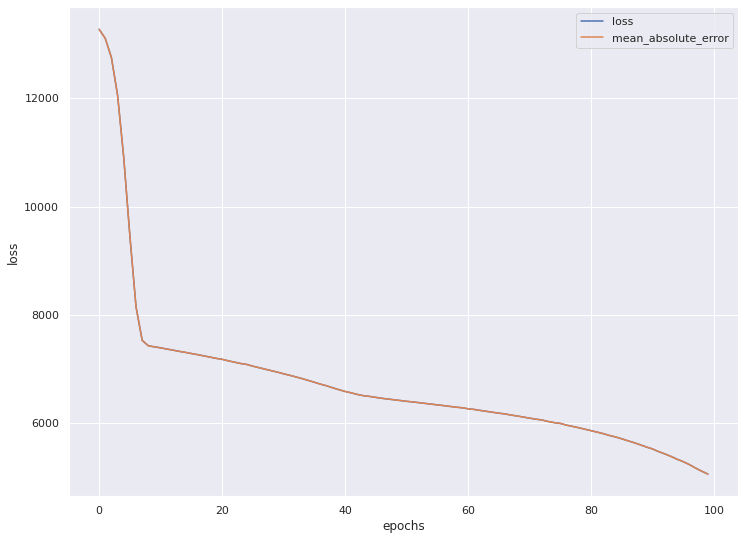

In [269]:
# Plot history for model 1( loss curve or training curve)

pd.DataFrame(history_1.history).plot(figsize = (12,9))
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [270]:
# Model Insurance 2
tf.random.set_seed(42)

# Step 1 : Create a model
model_insurance_2 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
                                        ])
# Step 2 : Compile the model
model_insurance_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = tf.keras.metrics.mae)

# Step 3 : Fit the model
history_2 = model_insurance_2.fit(X_train , y_train , epochs = 200 , verbose = False)

In [271]:
# Evaluate the model_2 : The losses though improved , is still very huge

model_insurance_2.evaluate(X_test , y_test)
print('Median of y_train:' , y_train.median())
print('Mean of y_train:' , y_train.mean())

9/9 [==============================] - 0s 1ms/step - loss: 3494.5291 - mean_absolute_error: 3494.5291
Median of y_train: 9575.4421
Mean of y_train: 13346.089736364489


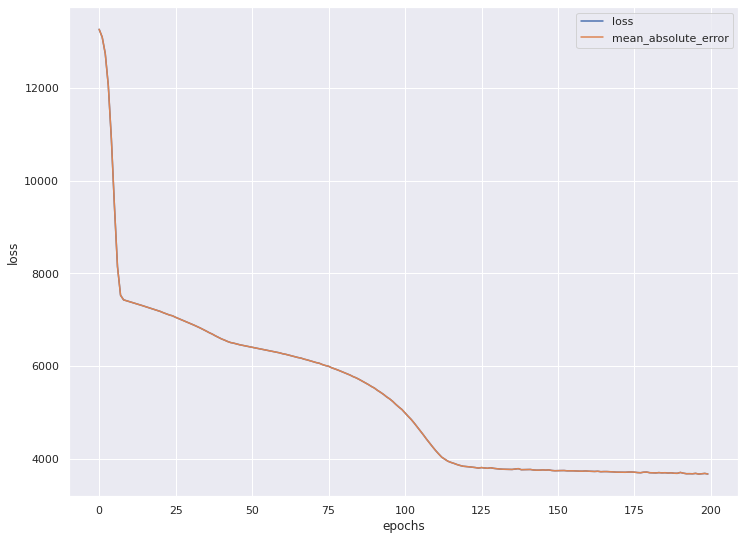

In [272]:
# Plot history( loss curve or training curve)

pd.DataFrame(history_2.history).plot(figsize = (12,9))
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

### Could we further improve the model and reduce the score?
- Try Normalising - scaling all values from their original range to be between 0 and 1
- Try Standardisation - converts all data to unit variance and 0 mean.
-  Neural networks tend to **favour normalization** as they tend to prefer values between 0 and 1 although it can perform pretty well with minimal feature scaling.

# Practise Modelling with Data from Kaggle : Medical Dataset (Preprocessing Normalizing & Standardising)
- Source : https://www.kaggle.com/mirichoi0218/insurance
- Source : https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv

In [273]:
### Reinitiate Dataset
df_insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [283]:
# Create a columns transformer
ct = make_column_transformer(
  (MinMaxScaler() , ['age' , 'bmi' , 'children']),
  (OneHotEncoder(handle_unknown = 'ignore') , ['sex' , 'smoker' , 'region'])
                            )

In [285]:
# Define dependant and independant variables
X = df_insurance.drop('charges' , axis = 1)
y = df_insurance['charges']


# Train , Test , Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with MinMaxScalar and OneHotEncoder
X_train_ss = ct.transform(X_train)
X_test_ss = ct.transform(X_test)

In [287]:
# Data before transformation

X_train.loc[1]

age                18
sex              male
bmi             33.77
children            1
smoker             no
region      southeast
Name: 1, dtype: object

In [292]:
# Data after transformation : 1st 3 number correspond to standardised numeric features (age , bmi , children) , 
# the subsequent array of 0 and 1 coorespond to the one hot encoded features

X_train_ss[1]

array([0.63043478, 0.22491256, 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

### Build & evalute model (With Transformed Data)
- Build a model to fit our standardised data

In [294]:
# Taking parameters from previous model params
model_insurance_2.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 100)               1200      
_________________________________________________________________
dense_102 (Dense)            (None, 10)                1010      
_________________________________________________________________
dense_103 (Dense)            (None, 1)                 11        
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [306]:
tf.random.set_seed(42)

# Step 1 : Create a model
model_insurance_3 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
                                         ])

# Step 2 : Compile the model
model_insurance_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                          metrics = tf.keras.metrics.mae)

# Step 3 : Fit the model
history_3 = model_insurance_3.fit(X_train_ss , y_train , epochs = 200 , verbose = False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [307]:
model_insurance_3.evaluate(X_test_ss , y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3162.5098 - mean_absolute_error: 3162.5098


[3162.509765625, 3162.509765625]

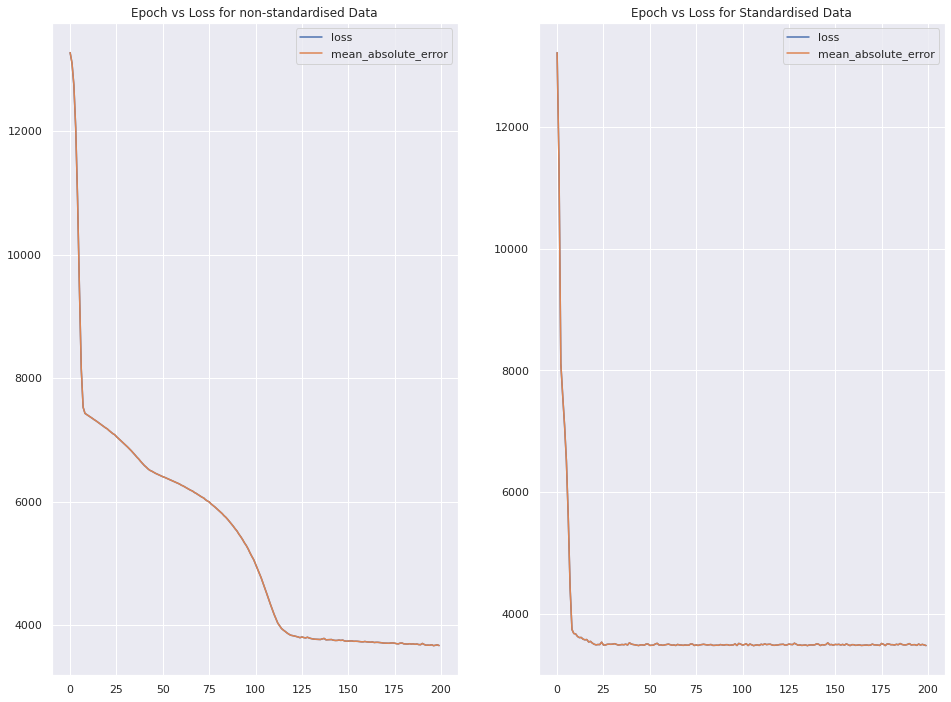

In [316]:
fig , (ax1 , ax2) = plt.subplots(1,2 , figsize = (16,12))

pd.DataFrame(history_2.history).plot(ax = ax1)
ax1.set_title('Epoch vs Loss for non-standardised Data')

pd.DataFrame(history_3.history).plot(ax = ax2)
ax2.set_title('Epoch vs Loss for Standardised Data')

plt.show()

### Observation
- Normalisation , Standardisation imporve convergence time
- Normalisation does not guarentee an improvement of score , but it is certainly worth implementing given that for larger dataset , it will significantly save processing time